# Time Series Exercise - 

### Follow along with the instructions in bold. Watch the solutions video if you get stuck!

## The Data

** Source: https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line **

**Monthly milk production: pounds per cow. Jan 62 - Dec 75**

** Import numpy pandas and matplotlib **

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

** Use pandas to read the csv of the monthly-milk-production.csv file and set index_col='Month' **

In [2]:
milk = pd.read_csv('./monthly-milk-production.csv', index_col='Month')

** Check out the head of the dataframe**

In [3]:
milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [4]:
milk.tail()

,Milk Production
Month,
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0
1975-10-01 01:00:00,827.0
1975-11-01 01:00:00,797.0
1975-12-01 01:00:00,843.0


** Make the index a time series by using: **

    milk.index = pd.to_datetime(milk.index)

In [5]:
milk.index = pd.to_datetime(milk.index)

** Plot out the time series data. **

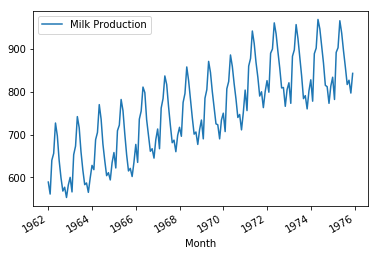

In [6]:
milk.plot()

___

### Train Test Split

** Let's attempt to predict a year's worth of data. (12 months or 12 steps into the future) **

** Create a test train split using indexing (hint: use .head() or tail() or .iloc[]). We don't want a random train test split, we want to specify that the test set is the last 12 months of data is the test set, with everything before it is the training. **

In [7]:
milk.describe()

,Milk Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [8]:
milk.size

168

In [9]:
train_data, test_data = milk.iloc[:156], milk.iloc[156:]

In [10]:
train_data

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
1962-06-01 01:00:00,697.0
1962-07-01 01:00:00,640.0
1962-08-01 01:00:00,599.0
1962-09-01 01:00:00,568.0


In [11]:
test_data

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


### Scale the Data

** Use sklearn.preprocessing to scale the data using the MinMaxScaler. Remember to only fit_transform on the training data, then transform the test data. You shouldn't fit on the test data as well, otherwise you are assuming you would know about future behavior!**

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(train_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
train_scaled = scaler.transform(train_data)

In [16]:
test_scaled = scaler.transform(test_data)

In [17]:
train_scaled

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [18]:
test_scaled

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

## Batch Function

** We'll need a function that can feed batches of the training data. We'll need to do several things that are listed out as steps in the comments of the function. Remember to reference the previous batch method from the lecture for hints. Try to fill out the function template below, this is a pretty hard step, so feel free to reference the solutions! **

In [19]:
def next_batch(training_data, steps):
    """
    INPUT: Data, Batch Size, Time Steps per batch
    OUTPUT: A tuple of y time series results. y[:,:-1] and y[:,1:]
    """
    
    # STEP 1: Use np.random.randint to set a random starting point index for the batch.
    # Remember that each batch needs have the same number of steps in it.
    # This means you should limit the starting point to len(data)-steps
    rand_start = np.random.randint(0, len(training_data) - steps)
    
    # STEP 2: Now that you have a starting index you'll need to index the data from
    # the random start to random start + steps + 1. Then reshape this data to be (1,steps+1)
    y_batch = np.array(training_data[rand_start:rand_start + steps + 1]).reshape(1, steps + 1)
    
    # STEP 3: Return the batches. You'll have two batches to return y[:,:-1] and y[:,1:]
    # You'll need to reshape these into tensors for the RNN to .reshape(-1,steps,1)
    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 

## Setting Up The RNN Model

### The Constants

** Define the constants in a single cell. You'll need the following (in parenthesis are the values I used in my solution, but you can play with some of these): **
* Number of Inputs (1)
* Number of Time Steps (12)
* Number of Neurons per Layer (100)
* Number of Outputs (1)
* Learning Rate (0.03)
* Number of Iterations for Training (4000)
* Batch Size (1)

In [20]:
num_of_inputs = 1
num_of_steps = 12
num_of_neurons = 100
num_of_outputs = 1
learning_rate = 0.001
num_of_iterations = 10000
batch_size = 1

** Create Placeholders for X and y. (You can change the variable names if you want). The shape for these placeholders should be [None,num_time_steps-1,num_inputs] and [None, num_time_steps-1, num_outputs] The reason we use num_time_steps-1 is because each of these will be one step shorter than the original time steps size, because we are training the RNN network to predict one point into the future based on the input sequence.**  

In [21]:
X = tf.placeholder(tf.float32, shape=[None, num_of_steps, num_of_inputs])
y = tf.placeholder(tf.float32, shape=[None, num_of_steps, num_of_outputs])

** Now create the RNN Layer, you have complete freedom over this, use tf.contrib.rnn and choose anything you want, OutputProjectionWrappers, BasicRNNCells, BasicLSTMCells, MultiRNNCell, GRUCell etc... Keep in mind not every combination will work well! (If in doubt, the solutions used an Outputprojection Wrapper around a basic LSTM cell with relu activation.**

In [22]:
# BasicRNNCell, BasicLSTMCell
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.GRUCell(num_units=num_of_neurons, activation=tf.nn.relu),
    output_size=num_of_outputs
)

** Now pass in the cells variable into tf.nn.dynamic_rnn, along with your first placeholder (X)**

In [23]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

### Loss Function and Optimizer

** Create a Mean Squared Error Loss Function and use it to minimize an AdamOptimizer, remember to pass in your learning rate. **

In [24]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

** Initialize the global variables **

In [25]:
init = tf.global_variables_initializer()

** Create an instance of tf.train.Saver() **

In [26]:
saver = tf.train.Saver()

### Session

** Run a tf.Session that trains on the batches created by your next_batch function. Also add an a loss evaluation for every 100 training iterations. Remember to save your model after you are done training. **

In [27]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.85)

In [28]:
with tf.Session(config = tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for iteration in range(num_of_iterations):
        x_batch, y_batch = next_batch(train_scaled, num_of_steps)
        
        sess.run(train, feed_dict={X: x_batch, y: y_batch})
        
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batch, y: y_batch})

            print(iteration, "\tMSE", mse)
    
    saver.save(sess, "./models/ex_time_series_model")

0 	MSE 0.49006224
100 	MSE 0.06261992
200 	MSE 0.06614551
300 	MSE 0.022301853
400 	MSE 0.017973164
500 	MSE 0.009455317
600 	MSE 0.008637109
700 	MSE 0.008144133
800 	MSE 0.01231446
900 	MSE 0.011051406
1000 	MSE 0.008413785
1100 	MSE 0.010174486
1200 	MSE 0.007323163
1300 	MSE 0.006796796
1400 	MSE 0.006883833
1500 	MSE 0.007771671
1600 	MSE 0.011864289
1700 	MSE 0.010987359
1800 	MSE 0.008614026
1900 	MSE 0.009589586
2000 	MSE 0.0033900915
2100 	MSE 0.0069561177
2200 	MSE 0.008208833
2300 	MSE 0.0043298774
2400 	MSE 0.0055312696
2500 	MSE 0.0060200742
2600 	MSE 0.004334641
2700 	MSE 0.008081025
2800 	MSE 0.0076944833
2900 	MSE 0.003991087
3000 	MSE 0.0041165743
3100 	MSE 0.0031338884
3200 	MSE 0.006577824
3300 	MSE 0.0038804465
3400 	MSE 0.0040791924
3500 	MSE 0.0054397644
3600 	MSE 0.009669729
3700 	MSE 0.004273522
3800 	MSE 0.006926749
3900 	MSE 0.0042537265
4000 	MSE 0.0031235926
4100 	MSE 0.0036409844
4200 	MSE 0.0053317384
4300 	MSE 0.0069532455
4400 	MSE 0.0032275238
4500 	MSE

______

## Predicting Future (Test Data)

** Show the test_set (the last 12 months of your original complete data set) **

In [29]:
test_data

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


** Now we want to attempt to predict these 12 months of data, using only the training data we had. To do this we will feed in a seed training_instance of the last 12 months of the training_set of data to predict 12 months into the future. Then we will be able to compare our generated 12 months to our actual true historical values from the test set! **

# Generative Session
### NOTE: Recall that our model is really only trained to predict 1 time step ahead, asking it to generate 12 steps is a big ask, and technically not what it was trained to do! Think of this more as generating new values based off some previous pattern, rather than trying to directly predict the future. You would need to go back to the original model and train the model to predict 12 time steps ahead to really get a higher accuracy on the test data. (Which has its limits due to the smaller size of our data set)
** Fill out the session code below to generate 12 months of data based off the last 12 months of data from the training set. The hardest part about this is adjusting the arrays with their shapes and sizes. Reference the lecture for hints.**

In [30]:
with tf.Session() as sess:
    saver.restore(sess, "./models/ex_time_series_model")
    
    train_seed = list(train_scaled[-num_of_steps:])
    
    for iteration in range(12):
        X_batch = np.array(train_seed[-num_of_steps:]).reshape(-1, num_of_steps, 1)

        y_pred = sess.run(outputs, feed_dict={X: X_batch})

        train_seed.append(
            np.array([y_pred[0, -1, 0]])
        )

INFO:tensorflow:Restoring parameters from ./models/ex_time_series_model


** Show the result of the predictions. **

In [31]:
train_seed

[array([0.66105769]),
 array([0.54086538]),
 array([0.80769231]),
 array([0.83894231]),
 array([1.]),
 array([0.94711538]),
 array([0.85336538]),
 array([0.75480769]),
 array([0.62980769]),
 array([0.62259615]),
 array([0.52884615]),
 array([0.625]),
 array([0.638105], dtype=float32),
 array([0.5506388], dtype=float32),
 array([0.76434356], dtype=float32),
 array([0.781139], dtype=float32),
 array([0.902131], dtype=float32),
 array([0.87432224], dtype=float32),
 array([0.830767], dtype=float32),
 array([0.78267384], dtype=float32),
 array([0.71790946], dtype=float32),
 array([0.70875305], dtype=float32),
 array([0.67334557], dtype=float32),
 array([0.6699679], dtype=float32)]

** Grab the portion of the results that are the generated values and apply inverse_transform on them to turn them back into milk production value units (lbs per cow). Also reshape the results to be (12,1) so we can easily add them to the test_set dataframe.**

In [32]:
results = scaler.inverse_transform(np.array(train_seed[12:]).reshape(12,1))

In [33]:
results

array([[818.45166],
       [782.06573],
       [870.96686],
       [877.95386],
       [928.2865 ],
       [916.718  ],
       [898.599  ],
       [878.5923 ],
       [851.6504 ],
       [847.84125],
       [833.11176],
       [831.7066 ]], dtype=float32)

** Create a new column on the test_set called "Generated" and set it equal to the generated results. You may get a warning about this, feel free to ignore it.**

In [34]:
test_data['Generated'] = results

/Users/hungphan/.pyenv/versions/3.6.2/envs/zendesk_3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


** View the test_set dataframe. **

In [35]:
test_data

,Milk Production,Generated
Month,,
1975-01-01 01:00:00,834.0,818.451660
1975-02-01 01:00:00,782.0,782.065735
1975-03-01 01:00:00,892.0,870.966858
1975-04-01 01:00:00,903.0,877.953857
1975-05-01 01:00:00,966.0,928.286499
1975-06-01 01:00:00,937.0,916.718018
1975-07-01 01:00:00,896.0,898.598999
1975-08-01 01:00:00,858.0,878.592285
1975-09-01 01:00:00,817.0,851.650391


** Plot out the two columns for comparison. **

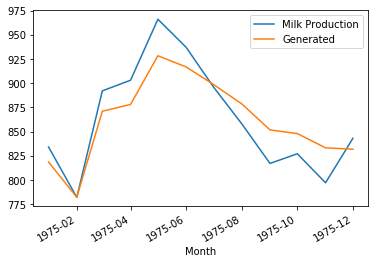

In [36]:
test_data.plot()

# Great Job!

Play around with the parameters and RNN layers, does a faster learning rate with more steps improve the model? What about GRU or BasicRNN units? What if you train the original model to not just predict one timestep ahead into the future, but 3 instead? Lots of stuff to add on here!